In [1]:
from actorcritic import ActorCriticAgent, EnvironmentWrapper
import gymnasium as gym
import datetime
import numpy as np

In [9]:
# hyperparameters
config = {
    'experiment': 'Acrobot2Cartpole',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 128, 64], 
    'lr_actor': 0.0001,
    'lr_critic': 0.0005,
    'verbosity': 10,
    'env_name': 'CartPole-v1',
    'gamma': 0.99, 
    'reward_threshold': 475.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 500

}

In [10]:
# Initialize the environment
env = gym.make(config['env_name'])
env_wrapper = EnvironmentWrapper(env)

# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

In [11]:
agent.load_models(env_name='Acrobot-v1')

In [12]:
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: 10.0, PLoss: 0.39698266983032227, VLoss: 521.1024780273438
Episode 10, Avg Reward: 9.636363636363637, PLoss: 0.005275517236441374, VLoss: 16.380573272705078
Episode 20, Avg Reward: 9.571428571428571, PLoss: -0.033234499394893646, VLoss: 1.8920539617538452
Episode 30, Avg Reward: 9.419354838709678, PLoss: 0.08090506494045258, VLoss: 3.011782169342041
Episode 40, Avg Reward: 9.390243902439025, PLoss: 0.09503929316997528, VLoss: 0.5026248097419739
Episode 50, Avg Reward: 9.352941176470589, PLoss: 0.5376753211021423, VLoss: 56.260772705078125
Episode 60, Avg Reward: 9.327868852459016, PLoss: 0.17042680084705353, VLoss: 15.543458938598633
Episode 70, Avg Reward: 9.32394366197183, PLoss: 0.025845253840088844, VLoss: 2.064868450164795
Episode 80, Avg Reward: 9.296296296296296, PLoss: 0.05063296854496002, VLoss: 3.7339892387390137
Episode 90, Avg Reward: 9.23076923076923, PLoss: 0.03712965175509453, VLoss: 13.620121002197266
Episode 100, Avg Reward: 9.24, PLoss: 0.017294

In [5]:
# Save the models
agent.save_models()

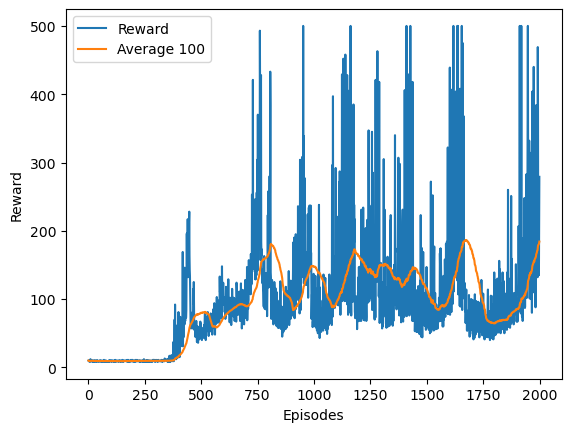

In [13]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [14]:
results['Duration']

1056.2459061145782

In [15]:
# save results with model name and time
now = datetime.datetime.now()
np.save(f'results/acrobot2cartpole', results)

In [12]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
%tensorboard --logdir runs/